# <font color=red><center>**PARTICIPATE IN THE DESIGN OF AN AUTONOMOUS CAR**</center></font>
# <font color=black><center>**Data structure and exploratory analysis**</center></font>

# <font color=blue>PART 1 - PROJECT BACKGROUND</font>

![fvt](https://drive.google.com/uc?export=view&id=1jpDlPR2VP5BRNgbnTna666EDun4GPRQ2)

## **<font color=green>The company</font>**

**Future Vision Transport** is a company that designs <font color=violet>onboard computer vision systems for autonomous cars</font>. 

These **systems dedicated to autonomous vehicles** embed several programs, combining vision - that is, perception of the environment, but also calculation of distances.

## **<font color=green>The team</font>**

The R&D team is composed of several engineers specialized in the 4 components of the **Vision** part of the embedded system:
1. real-time image acquisition;
2. image processing
3. image segmentation; 
4. and finally, the decision system.

## **<font color=green>The mission</font>**

Our mission will focus on the embedded system part 3: **design, train and deploy an image segmentation model**, which will easily integrate into the complete chain.

# <font color=blue>PART 2 - DATASET</font>

## **<font color=green>Cityscapes Dataset</font>**

We will work with the dataset [Cityscapes](https://www.cityscapes-dataset.com/dataset-overview/).

## **<font color=green>Available data</font>**
The dataset was split in 3 dataset :
-	Le **Train Set**, with 2975 images and labeled masks, disponibles publiquement ;
-	Le **Validation Set**, with 500 images et labeled masks, disponibles publiquement ;
-	Le **Test Set**, with 1525 images <font color=orange>without the labeled mask for the evaluation of the model</font>.

> **Actions** : 
- Work only on the **Train** and **Validation** sets in order to train and evaluate the models (ability to predict correctly);
- Keep the **Validation** set to make it a **Test** set;
- Create a new **Validation** set by doing a split on the **Train** set: 80% for training, 20% for validation.

## **<font color=green>Structure of dataset</font>**

Images and masks are in 2 folders:
- <code>**leftlmg8bit**</code>, with train, val et test folders with original images;
- <code>**gtFine**</code>, with train, val et test folders with labeled images with 30 categories.

We correct this particular structure, in order to ensure the integrity of the different data sets, and to facilitate the calling of images and masks by our test models.

> **Actions** : 
- Delete intermediate city folders ;
- Rename images by removing suffixes <code>_leftlmg8bit</code> and <code>_gtFine_labelIds</code>, to ensure that the images and their annotated masks have exactly the same name.

## **<font color=green>Mask annotations</font>**

The annotated masks come with **30 class assignments**. 

In our project, we only need the **8 main categories** as described in the table below: 

| 8 catégories principales | 8 IDs | Couleur de segmentation |
| :--: | :--: | :--: |
| void | 0 | Gris clair |
| flat | 1 | Rouge |
| construction | 2 | Jaune |
| object | 3 | Vert clair | 
| nature | 4 | Vert foncé |
| sky | 5 | Bleu clair |
| human | 6 | Bleu roi |
| vehicle | 7 | Noir | 

> **Actions** : 
- Create a mapping table of the 30 classes to their main category.
- Save the images for future use.

# <font color=blue>PART 3 - DATA REORGANISATION</font>

## **<font color=green>Importing libraries</font>**

In [1]:
from IPython.display import clear_output
!pip install git+https://github.com/aleju/imgaug.git
clear_output()

In [2]:
# Import libraries
import numpy as np
import random
import os
from glob import glob
import shutil
import matplotlib.pyplot as plt
import cv2
from collections import namedtuple, Counter
from tqdm import tqdm
from imgaug import augmenters as iaa

%matplotlib inline

## **<font color=green>Moving images and masks to the final folders</font>**

In [4]:
# Set origin folders
train_image_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\raw\\leftImg8bit\\train\\*\\*.png'
train_mask_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\raw\\gtFine\\train\\*\\*_labelIds.png'
val_image_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\raw\\leftImg8bit\\val\\*\\*.png'
val_mask_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\raw\\gtFine\\val\\*\\*_labelIds.png'
test_image_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\raw\\leftImg8bit\\test\\*\\*.png'
test_mask_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\raw\\gtFine\\test\\*\\*_labelIds.png'

# # Set final destination folders
train_input_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\train\\images'
train_masks30_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\train\\masks30'
test_input_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\test\\images'
test_masks30_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\test\\masks30'

In [5]:
test_masks30_dir

'C:\\\\Users\\\\ezequ\\\\proyectos\\\\openclassrooms\\\\Projet_8\\\\data\\\\data_final_2\\\\test\\\\masks30'

In [6]:
train_input_dir

'C:\\\\Users\\\\ezequ\\\\proyectos\\\\openclassrooms\\\\Projet_8\\\\data\\\\data_final_2\\\\train\\\\images'

In [7]:
# Function to move file from origin to destination path
def move_files(origin, destination):
    # Check if origin is directory or list
    if isinstance(origin, list):
        origin_fname = origin
    else :
        origin_fname = glob(origin)
    
    for file in origin_fname:
        shutil.move(file, destination)

In [8]:
move_files(train_image_dir, train_input_dir)
move_files(train_mask_dir, train_masks30_dir)
move_files(val_image_dir, test_input_dir)
move_files(val_mask_dir, test_masks30_dir)

In [9]:
print('Train Images Count: ', len(os.listdir(train_input_dir)), '- 1st file name: ', sorted(os.listdir(train_input_dir))[0])
print('Train Masks Count: ', len(os.listdir(train_masks30_dir)), '- 1st file name: ', sorted(os.listdir(train_masks30_dir))[0])
print('Test Images Count: ', len(os.listdir(test_input_dir)), '- 1st file name: ', sorted(os.listdir(test_input_dir))[0])
print('Test Masks Count: ', len(os.listdir(test_masks30_dir)), '- 1st file name: ', sorted(os.listdir(test_masks30_dir))[0])

Train Images Count:  2975 - 1st file name:  aachen_000000_000019_leftImg8bit.png
Train Masks Count:  2975 - 1st file name:  aachen_000000_000019_gtFine_labelIds.png
Test Images Count:  500 - 1st file name:  frankfurt_000000_000294_leftImg8bit.png
Test Masks Count:  500 - 1st file name:  frankfurt_000000_000294_gtFine_labelIds.png


## **<font color=green>Renaming of images and masks</font>**

In [10]:
# Create a function to rename files
def rename_file(path, is_mask=False):
    """ Provide path of file to be renamed
    """
    # Create a list of file
    file_list = np.array(os.listdir(path))

    # Iterate over the filelist
    for filename in file_list:
        if is_mask == True:
            dest = filename.split('_gtFine_labelIds')[0]+'.png'
        else:
            dest = filename.split('_leftImg8bit')[0]+'.png'

        src = path + '/' + filename
        dest = path + '/' + dest
        os.rename(src, dest)

In [11]:
# # Call the function
rename_file(train_input_dir, is_mask=False)
rename_file(train_masks30_dir, is_mask=True)
rename_file(test_input_dir, is_mask=False)
rename_file(test_masks30_dir, is_mask=True)

In [12]:
print('Train Images Count: ', len(os.listdir(train_input_dir)), '- 1st file name: ', sorted(os.listdir(train_input_dir))[0])
print('Train Masks Count: ', len(os.listdir(train_masks30_dir)), '- 1st file name: ', sorted(os.listdir(train_masks30_dir))[0])
print('Test Images Count: ', len(os.listdir(test_input_dir)), '- 1st file name: ', sorted(os.listdir(test_input_dir))[0])
print('Test Masks Count: ', len(os.listdir(test_masks30_dir)), '- 1st file name: ', sorted(os.listdir(test_masks30_dir))[0])

Train Images Count:  2975 - 1st file name:  aachen_000000_000019.png
Train Masks Count:  2975 - 1st file name:  aachen_000000_000019.png
Test Images Count:  500 - 1st file name:  frankfurt_000000_000294.png
Test Masks Count:  500 - 1st file name:  frankfurt_000000_000294.png


## **<font color=green>Set creation Validation</font>**

In [13]:
# Set validation folder
val_input_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\val\\images'
val_masks30_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\val\\masks30'

In [14]:
# Sort the images and masks of Train dataset
train_input_fname = sorted(
    [os.path.join(
        train_input_dir, fname) for fname in os.listdir(train_input_dir)])

train_target_fname = sorted(
    [os.path.join(
        train_masks30_dir, fname) for fname in os.listdir(train_masks30_dir)])

In [15]:
# Split into train and validation data
val_input_path = train_input_fname[2380:]
val_target_path = train_target_fname[2380:]

In [16]:
# # Move files from Train to Val
move_files(val_input_path, val_input_dir)
move_files(val_target_path, val_masks30_dir)

In [17]:
# Check files
print('Val Images Count: ', len(os.listdir(val_input_dir)), '- 1st file name: ', sorted(os.listdir(val_input_dir))[0])
print('Val Masks Count: ', len(os.listdir(val_masks30_dir)), '- 1st file name: ', sorted(os.listdir(val_masks30_dir))[0])

Val Images Count:  595 - 1st file name:  stuttgart_000104_000019.png
Val Masks Count:  595 - 1st file name:  stuttgart_000104_000019.png


# <font color=blue>PART 4 - MAPPING TO THE 8 MAIN CATEGORIES</font>

## **<font color=green>Mapping methodology</font>**

We will use the methodology of one of the creators of the dataset: [Github de Marius Cordts](https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py).

In [18]:
# Adaptation from the official Cityscapes scripts
# https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py

#--------------------------------------------------------------------------------
# Definitions : 
#--------------------------------------------------------------------------------
# Create tuple subclasses with named fields
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name the 30 classes

    'id'          , # An integer ID that is associated with this label.

    'categoryId'       , # IDs of labels which match to pixel values
                    # corresponding to the 8 main categories.

    'category'    , # The name of the category that this label belongs to
    ] )

#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

labels = [
    #name                             id    catId   category
    Label(  'unlabeled'            ,  0 ,      0 , 'void'),
    Label(  'ego vehicle'          ,  1 ,      0 , 'void'),
    Label(  'rectification border' ,  2 ,      0 , 'void'),
    Label(  'out of roi'           ,  3 ,      0 , 'void'),
    Label(  'static'               ,  4 ,      0 , 'void'),
    Label(  'dynamic'              ,  5 ,      0 , 'void'),
    Label(  'ground'               ,  6 ,      0 , 'void'),
    Label(  'road'                 ,  7 ,      1 , 'flat'),
    Label(  'sidewalk'             ,  8 ,      1 , 'flat'),
    Label(  'parking'              ,  9 ,      1 , 'flat'),
    Label(  'rail track'           , 10 ,      1 , 'flat'),
    Label(  'building'             , 11 ,      2 , 'construction'),
    Label(  'wall'                 , 12 ,      2 , 'construction'),
    Label(  'fence'                , 13 ,      2 , 'construction'),
    Label(  'guard rail'           , 14 ,      2 , 'construction'),
    Label(  'bridge'               , 15 ,      2 , 'construction'),
    Label(  'tunnel'               , 16 ,      2 , 'construction'),
    Label(  'pole'                 , 17 ,      3 , 'object'),
    Label(  'polegroup'            , 18 ,      3 , 'object'),
    Label(  'traffic light'        , 19 ,      3 , 'object'),
    Label(  'traffic sign'         , 20 ,      3 , 'object'),
    Label(  'vegetation'           , 21 ,      4 , 'nature'),
    Label(  'terrain'              , 22 ,      4 , 'nature'),
    Label(  'sky'                  , 23 ,      5 , 'sky'),
    Label(  'person'               , 24 ,      6 , 'human'),
    Label(  'rider'                , 25 ,      6 , 'human'),
    Label(  'car'                  , 26 ,      7 , 'vehicle'),
    Label(  'truck'                , 27 ,      7 , 'vehicle'),
    Label(  'bus'                  , 28 ,      7 , 'vehicle'),
    Label(  'caravan'              , 29 ,      7 , 'vehicle'),
    Label(  'trailer'              , 30 ,      7 , 'vehicle'),
    Label(  'train'                , 31 ,      7 , 'vehicle'),
    Label(  'motorcycle'           , 32 ,      7 , 'vehicle'),
    Label(  'bicycle'              , 33 ,      7 , 'vehicle'),
    Label(  'license plate'        , -1 ,      7 , 'vehicle')]

In [19]:
# Function to map labels and categories
def map_id2category(labels):
    """ This function maps the ~30 labels' IDs
        to the 8 main categories' IDs
    """
    cat_label = {label.id: label.categoryId for label in labels}
    
    # Get the mapping
    map_category = np.vectorize(cat_label.get)
    return map_category

## **<font color=green>Saving corrected masks</font>**

We will save the corrected annotation masks with the 8 main categories to speed up our model benchmark.

In [20]:
# Set masks folders with 8 main categories
train_target_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\train\\masks'
val_target_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\val\\masks'
test_target_dir = r'C:\\Users\\ezequ\\proyectos\\openclassrooms\\Projet_8\\data\\data_final_2\\test\\masks'

In [1]:
# Function to create new masks (8 categories)
def old_to_new_mask(img_path, msk30_path, msk8_path, labels):
    # Create lists
    img_list = os.listdir(img_path)
    msk30_list = os.listdir(msk30_path)

    # Sort list
    img_list.sort()
    msk30_list.sort()

    for i in range(0, len(img_list)):
        # Read images and masks
        img = cv2.imread(f'{img_path}/{img_list[i]}')/255
        msk30 = cv2.imread(f'{msk30_path}/{msk30_list[i]}', 
                           cv2.IMREAD_GRAYSCALE)
        
        # Convert msk30 to msk8
        map_category = map_id2category(labels)
        msk8 = map_category(msk30)

        # Save new masks on disk
        cv2.imwrite(f'{msk8_path}/{msk30_list[i]}', msk8)

In [22]:
# Save the masks for TRAIN
old_to_new_mask(train_input_dir, train_masks30_dir, train_target_dir, labels)

# Save the masks for VAL
old_to_new_mask(val_input_dir, val_masks30_dir, val_target_dir, labels)

# Save the masks for TEST
old_to_new_mask(test_input_dir, test_masks30_dir, test_target_dir, labels)

In [23]:
print('Train Images Count: ', len(os.listdir(train_input_dir)), '- 1st file name: ', sorted(os.listdir(train_input_dir))[0])
print('Train Masks Count: ', len(os.listdir(train_target_dir)), '- 1st file name: ', sorted(os.listdir(train_target_dir))[0])
print('Val Images Count: ', len(os.listdir(val_input_dir)), '- 1st file name: ', sorted(os.listdir(val_input_dir))[0])
print('Val Masks Count: ', len(os.listdir(val_target_dir)), '- 1st file name: ', sorted(os.listdir(val_target_dir))[0])
print('Test Images Count: ', len(os.listdir(test_input_dir)), '- 1st file name: ', sorted(os.listdir(test_input_dir))[0])
print('Test Masks Count: ', len(os.listdir(test_target_dir)), '- 1st file name: ', sorted(os.listdir(test_target_dir))[0])

Train Images Count:  2380 - 1st file name:  aachen_000000_000019.png
Train Masks Count:  2380 - 1st file name:  aachen_000000_000019.png
Val Images Count:  595 - 1st file name:  stuttgart_000104_000019.png
Val Masks Count:  595 - 1st file name:  stuttgart_000104_000019.png
Test Images Count:  500 - 1st file name:  frankfurt_000000_000294.png
Test Masks Count:  500 - 1st file name:  frankfurt_000000_000294.png


# <font color=blue>PART 5 - EXPLORATORY DATA ANALYSIS</font>

## **<font color=green>Viewing images and masks</font>**

In [24]:
# Visualise original images, masks30 and masks8
def visualize_img_msk30_msk8(img_path, msk30_path, msk8_path, n=0):
    # Create lists
    img_list = os.listdir(img_path)
    msk30_list = os.listdir(msk30_path)
    msk8_list = os.listdir(msk8_path)

    # Sort list
    img_list.sort()
    msk30_list.sort()
    msk8_list.sort()

    for i in range(n, n+2):
        img = cv2.imread(f'{img_path}/{img_list[i]}')
        msk30 = cv2.imread(f'{msk30_path}/{msk30_list[i]}', 
                           cv2.IMREAD_GRAYSCALE)
        msk8 = cv2.imread(f'{msk8_path}/{msk8_list[i]}',
                          cv2.IMREAD_GRAYSCALE)
        
        # Plot
        fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 20))
        ax1.imshow(img)
        ax1.set_title('Original Image')
        ax1.axis('off')
        ax2.imshow(msk30, cmap='nipy_spectral')
        ax2.set_title('True Mask 30')
        ax2.axis('off')
        ax3.imshow(msk8, cmap='nipy_spectral_r')
        ax3.set_title('True Mask 8')
        ax3.axis('off')
        plt.show()

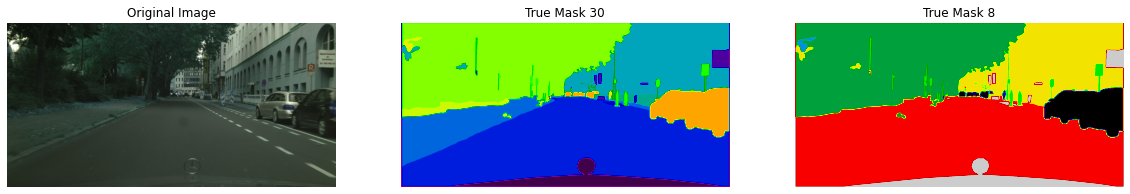

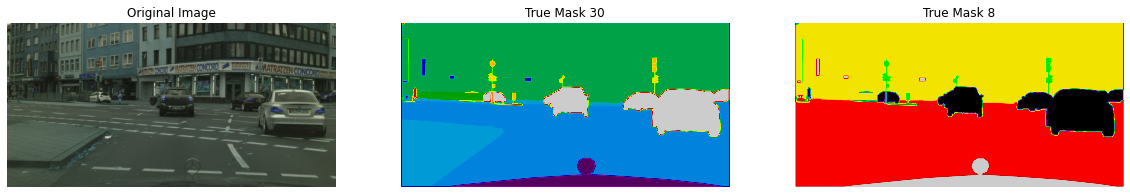

In [25]:
# Call the function to visualize different examples of each dataset
visualize_img_msk30_msk8(train_input_dir, train_masks30_dir, train_target_dir, n=2)

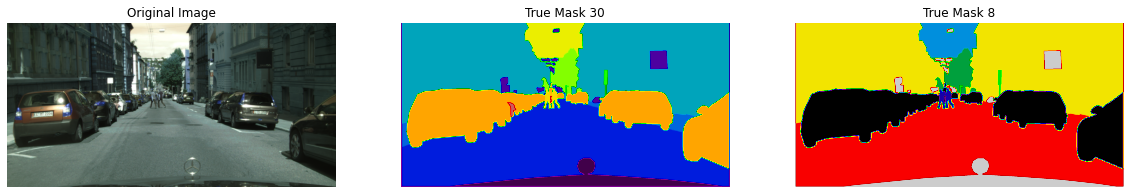

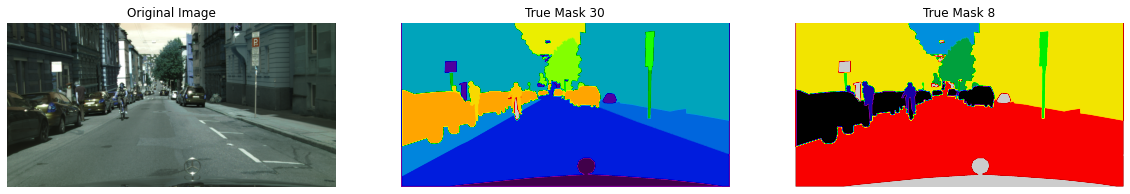

In [26]:
visualize_img_msk30_msk8(val_input_dir, val_masks30_dir, val_target_dir, n=2)

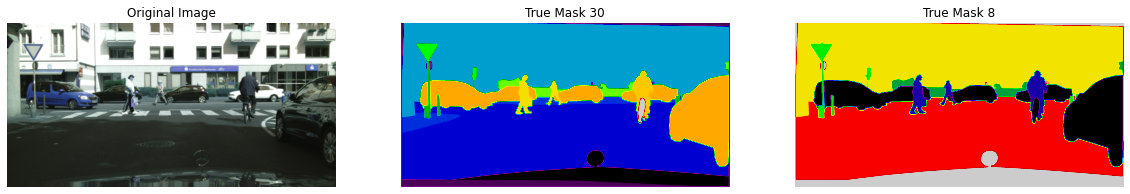

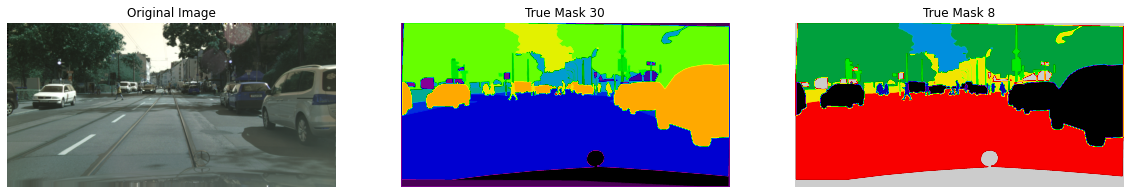

In [27]:
visualize_img_msk30_msk8(test_input_dir, test_masks30_dir, test_target_dir, n=2)

## **<font color=green>Class distribution analysis</font>**

In [28]:
# Function to compute and plot classes' distribution
def class_distribution(msk_path, dataset='Train'):
    msk_list = os.listdir(msk_path)
    msk_list.sort()

    # Create an empty list
    sums = []

    # Load image data
    for i in tqdm(range(0, len(msk_list))):
        mask = cv2.imread(f'{msk_path}/{msk_list[i]}',
                          cv2.IMREAD_GRAYSCALE)
        
        # Return a list of occurence of each unique label value
        (unique, counts) = np.unique(mask, return_counts=True)

        # Store the result in a list of dictionary
        sums.append(dict(zip(unique, counts)))

    # Instantiate a counter
    result_counter = Counter()

    # Iterate over elements in sums
    for elem in sums:
        for key, value in elem.items():
            result_counter[key] += value
    
    # print(result_counter)

    categ = {'void': 0, 'flat': 1, 'construction': 2, 
             'object': 3, 'nature': 4, 'sky': 5, 
             'human': 6, 'vehicle': 7}
    my_colors = ['lightgrey', 'red', 'yellow', 'greenyellow',
                 'forestgreen', 'deepskyblue', 'royalblue', 'black']
    
    # Plot the classes distribution
    plt.figure()
    plt.bar(x=categ.keys(), height=result_counter.values(),
            tick_label=list(categ.keys()), color=my_colors)
    plt.xticks(rotation=45)
    plt.title(dataset +' Classes distribution')
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 2380/2380 [01:12<00:00, 32.85it/s]


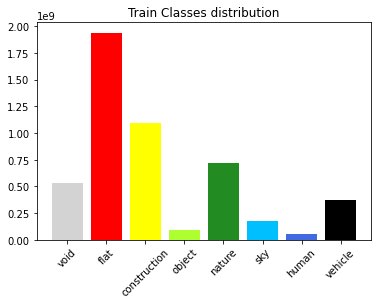

100%|████████████████████████████████████████████████████████████████████████████████| 595/595 [00:16<00:00, 35.60it/s]


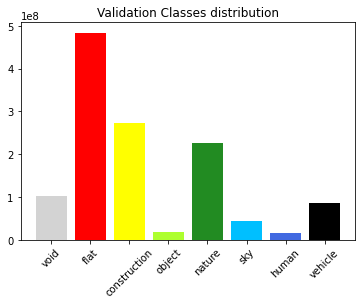

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:13<00:00, 36.46it/s]


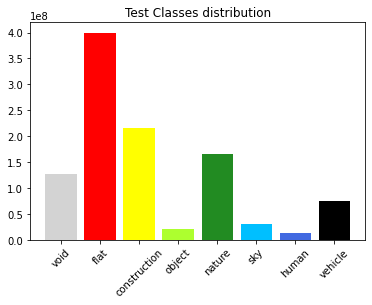

In [29]:
# Call the function
class_distribution(train_target_dir, dataset='Train')
class_distribution(val_target_dir, dataset='Validation')
class_distribution(test_target_dir, dataset='Test')

We are faced with a dataset where the **classes are unbalanced**, which is a relatively frequent situation in datasets. 

This information is important when it comes to **measuring the performance of our models**. Indeed, we must be wary of the **accuracy** (or ***accuracy***) because the model will probably predict over-represented classes with much more robustness than under-represented classes.

It will therefore be necessary to choose an appropriate metric.

# <font color=blue>PART 5 - DATA AUGMENTATION</font>

Data augmentation is applied only to images and not to masks!

## **<font color=green>Loading an image</font>**

In [30]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

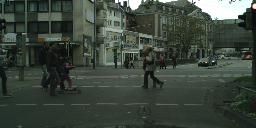

In [31]:
# Set parameters
img_height, img_width = 128, 256
img_size = (img_height, img_width)

# Set path
train_input_path = sorted(glob(train_input_dir + '/*.png'))

# Load image for test
img = load_img(f'{train_input_path[14]}', target_size=img_size)
img

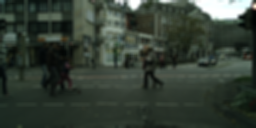

In [32]:
# Test of blur
blur_transform = iaa.Sequential([iaa.GaussianBlur(sigma=(0, 3.0))])
img_blur = blur_transform(image=img_to_array(img))
array_to_img(img_blur)

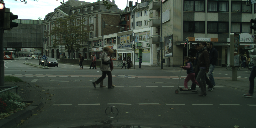

In [33]:
# Test of flip
flip_transform = iaa.Sequential([iaa.Fliplr()])
img_flip = flip_transform(image=img_to_array(img))
array_to_img(img_flip)

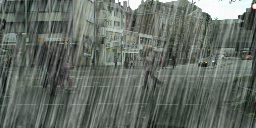

In [34]:
# Test of rain
rain_transform = iaa.Sequential([iaa.Rain(speed=(0.1, 0.3))])
img_rain = rain_transform(image=img_to_array(img))
array_to_img(img_rain)

In [35]:
img_rain.shape

(128, 256, 3)

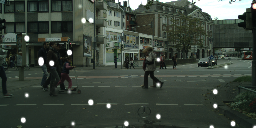

In [36]:
# Test of snowflakes
snowf_transform = iaa.Sequential([iaa.Snowflakes(flake_size=(0.7, 0.8), speed=(0.01, 0.03))])
img_snowf = snowf_transform(image=img_to_array(img))
array_to_img(img_snowf)